In [1]:
!pip install -U scikit-learn scipy matplotlib


You should consider upgrading via the '/Users/eserinanarslan/churn_probability/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
pip install imblearn

You should consider upgrading via the '/Users/eserinanarslan/churn_probability/venv/bin/Python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade seaborn

You should consider upgrading via the '/Users/eserinanarslan/churn_probability/venv/bin/Python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

You should consider upgrading via the '/Users/eserinanarslan/churn_probability/venv/bin/Python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import random

import time
from datetime import datetime
import sqlite3 as sql

%matplotlib inline

import datetime as dt

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, make_scorer, accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_df4 = pd.read_csv("../dataset/opioid_dataset.csv")
#train_df4.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,model,...,churn,last_year,last_month,last_day,first_year,first_month,first_day,product_cat__com-bonial-kaufda,product_cat__de-kaufda-android,product_cat__de.kaufda.kaufda
0,9491a960-206a-4a58-9177-e78cb1f05e70,0.080000,0.028102,672239440,0,2017,4,30,0.0,34,...,0.0,2017,7,31,2017,4,2,1,0,0
1,9491a960-206a-4a58-9177-e78cb1f05e70,0.005333,0.005463,673861625,0,2017,4,30,0.0,34,...,0.0,2017,7,31,2017,4,2,1,0,0
2,9491a960-206a-4a58-9177-e78cb1f05e70,0.002667,0.007946,660764240,0,2017,4,30,0.0,34,...,0.0,2017,7,31,2017,4,2,1,0,0
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,0.170667,0.046186,672658544,0,2017,4,30,0.0,40,...,1.0,2017,6,21,2017,4,1,1,0,0
4,9491a960-206a-4a58-9177-e78cb1f05e70,0.002667,0.012664,660764240,0,2017,4,30,0.0,34,...,0.0,2017,7,31,2017,4,2,1,0,0


In [10]:
train_df4 = train_df4.rename({'userId' : 'PatientId','Actual_Churn' : 'Actual_Diagnosis',
                              'Churn_Score' : 'Addict_Score', 'churn': 'Opioid'}, axis = 1)

In [11]:
train_df5 = train_df4.copy()

In [12]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [13]:
train_df4 = reduce_mem_usage(train_df4)

Mem. usage decreased to 15.44 Mb (76.0% reduction)


In [15]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train_df4['PatientId'] = labelencoder.fit_transform(train_df4['PatientId'])

In [16]:
X_no = train_df4[train_df4.Opioid == 0]
X_yes = train_df4[train_df4.Opioid == 1]

In [17]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

265139


In [18]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
#sns.countplot('Opioid', data=X_upsampled).set_title('Class Distribution After Resampling')#

In [19]:
X = X_upsampled.drop(['Opioid'], axis=1) #features (independent variables)
y = X_upsampled['Opioid'] #target (dependent variable)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

**#RidgeClassifier**

In [22]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.26469
Feature: 2, Score: 0.04708
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.89623
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.12517
Feature: 7, Score: -0.00182
Feature: 8, Score: 0.72538
Feature: 9, Score: -0.00001
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.21986
Feature: 12, Score: -1.09434
Feature: 13, Score: -0.05682
Feature: 14, Score: -0.05418
Feature: 15, Score: -0.64115
Feature: 16, Score: -0.02404
Feature: 17, Score: -0.05418
Feature: 18, Score: 1.29040
Feature: 19, Score: 0.06215
Feature: 20, Score: 0.41073
Feature: 21, Score: 0.40205
Feature: 22, Score: -0.79984


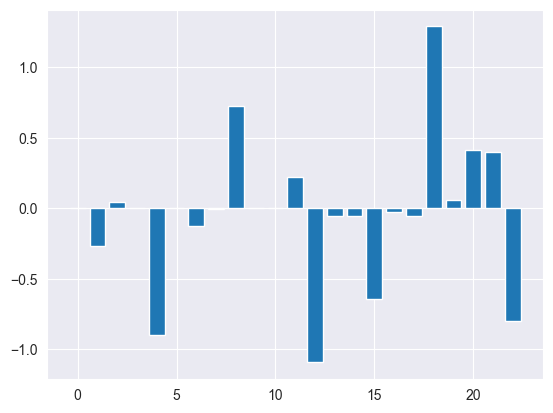

In [24]:
ridge_importance = clf_ridge.coef_[0]
# summarize feature importance
for i,v in enumerate(ridge_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(ridge_importance))], ridge_importance)
plt.show()

In [25]:
ridge_pred_test = clf_ridge.predict(X_test)

In [26]:
accuracy_score(y_test, ridge_pred_test)

0.8597816248019914

In [27]:
print(classification_report(y_test, ridge_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85     53180
         1.0       0.82      0.92      0.87     52876

    accuracy                           0.86    106056
   macro avg       0.87      0.86      0.86    106056
weighted avg       0.87      0.86      0.86    106056



**#RandomForestClassifier**

In [28]:
n_estimators = [700]
max_depth = [10, 8]
min_samples_split = [10, 5]
min_samples_leaf = [5, 3]

In [29]:
hyper_random = {"n_estimators":n_estimators,
                "max_depth":max_depth,
                "min_samples_split":min_samples_split,
                "min_samples_leaf":min_samples_leaf}

In [30]:
start = time.time()
print(start)
clf_rf_tuned = GridSearchCV(RandomForestClassifier(), hyper_random, 
                            cv = 5, verbose = 1, 
                            n_jobs = -1)
clf_rf_tuned.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("\nProcess Time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


1669311942.91642
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Process Time: 00:39:23.44


In [31]:
best_params_random = clf_rf_tuned.best_params_
print(best_params_random)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 700}


In [32]:
CV_clf_rf = RandomForestClassifier(max_depth=best_params_random["max_depth"],
                                   min_samples_leaf=best_params_random["min_samples_leaf"],
                                   min_samples_split=best_params_random["min_samples_split"],
                                   n_estimators= best_params_random["n_estimators"])

In [33]:
CV_clf_rf.fit(X_train, y_train)
y_test_predict_random = CV_clf_rf.predict_proba(X_test)[:, 1]
yhat_random = CV_clf_rf.predict(X_test)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_random, n_bins=10)

In [34]:
print(classification_report(y_test, yhat_random))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     53180
         1.0       0.89      0.93      0.91     52876

    accuracy                           0.90    106056
   macro avg       0.91      0.90      0.90    106056
weighted avg       0.91      0.90      0.90    106056



In [35]:
final_df = pd.DataFrame()


In [36]:
final_df['PatientId'] = X_test.PatientId
final_df['Actual_Diagnosis'] = y_test
final_df['Random_Forest_Probability'] = y_test_predict_random
final_df.shape

(106056, 3)

**#CalibratedClassifierCV**

In [37]:
start = time.time()

# Create a corrected classifier.

clf_sigmoid = CalibratedClassifierCV(CV_clf_rf, cv=10, method='sigmoid')
clf_sigmoid.fit(X_train, y_train)
y_test_predict_random_calibrated = clf_sigmoid.predict_proba(X_test)[:, 1]
yhat_calibrated_random = clf_sigmoid.predict(X_test)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_random_calibrated, n_bins=10)


end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("\nProcess Time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


Process Time: 00:25:49.81


In [38]:
print(classification_report(y_test, yhat_calibrated_random))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     53180
         1.0       0.89      0.92      0.91     52876

    accuracy                           0.90    106056
   macro avg       0.90      0.90      0.90    106056
weighted avg       0.90      0.90      0.90    106056



In [39]:
final_df['Calibrated_Random_Forest_Probability'] = y_test_predict_random_calibrated
final_df.shape

(106056, 4)

In [40]:
print(classification_report(y_test, ridge_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85     53180
         1.0       0.82      0.92      0.87     52876

    accuracy                           0.86    106056
   macro avg       0.87      0.86      0.86    106056
weighted avg       0.87      0.86      0.86    106056



In [41]:
print(classification_report(y_test, yhat_random))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     53180
         1.0       0.89      0.93      0.91     52876

    accuracy                           0.90    106056
   macro avg       0.91      0.90      0.90    106056
weighted avg       0.91      0.90      0.90    106056



In [42]:
print(classification_report(y_test, yhat_calibrated_random))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     53180
         1.0       0.89      0.92      0.91     52876

    accuracy                           0.90    106056
   macro avg       0.90      0.90      0.90    106056
weighted avg       0.90      0.90      0.90    106056



**#GaussianNaiveBias**

In [43]:
start = time.time()
# Uncalibrated
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_test_predict_nb = clf_nb.predict_proba(X_test)[:, 1]
yhat_nb = clf_nb.predict(X_test)
fraction_of_positives_nb, mean_predicted_value_nb = calibration_curve(y_test, y_test_predict_nb, n_bins=10)

#plt.plot(mean_predicted_value_nb, fraction_of_positives_nb, 's-', label='Uncalibrated')

# Calibrated
clf_sigmoid_nb = CalibratedClassifierCV(clf_nb, cv=10, method='isotonic')
clf_sigmoid_nb.fit(X_train, y_train)
y_test_predict_nb_calib = clf_sigmoid_nb.predict_proba(X_test)[:, 1]
yhat_calibrated_nb = clf_sigmoid_nb.predict(X_test)
fraction_of_positives_nb_calib, mean_predicted_value_nb_calib = calibration_curve(y_test, y_test_predict_nb_calib, n_bins=10)

#plt.plot(mean_predicted_value_nb_calib, fraction_of_positives_nb_calib, 's-', color='red', label='Calibrated (Isotonic)')

# Calibrated, Platt
clf_sigmoid_nb_calib_sig = CalibratedClassifierCV(clf_nb, cv=10, method='sigmoid')
clf_sigmoid_nb_calib_sig.fit(X_train, y_train)

y_test_predict_nb_calib_platt = clf_sigmoid_nb_calib_sig.predict_proba(X_test)[:, 1]
yhat_calibrated_platt = clf_sigmoid_nb_calib_sig.predict(X_test)

fraction_of_positives_nb_calib_platt, mean_predicted_value_nb_calib_platt = calibration_curve(y_test, y_test_predict_nb_calib_platt, n_bins=10)
#plt.plot(mean_predicted_value_nb_calib_platt, fraction_of_positives_nb_calib_platt, 's-', color='orange', label='Calibrated (Platt)')

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("\nProcess Time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


Process Time: 00:00:03.75


In [44]:
print(classification_report(y_test, yhat_nb))

              precision    recall  f1-score   support

         0.0       0.72      0.62      0.66     53180
         1.0       0.66      0.76      0.71     52876

    accuracy                           0.69    106056
   macro avg       0.69      0.69      0.69    106056
weighted avg       0.69      0.69      0.69    106056



In [45]:
print(classification_report(y_test, yhat_calibrated_nb))


              precision    recall  f1-score   support

         0.0       0.78      0.54      0.64     53180
         1.0       0.65      0.85      0.73     52876

    accuracy                           0.69    106056
   macro avg       0.71      0.69      0.68    106056
weighted avg       0.71      0.69      0.68    106056



In [46]:
print(classification_report(y_test, yhat_calibrated_platt))

              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67     53180
         1.0       0.67      0.74      0.70     52876

    accuracy                           0.68    106056
   macro avg       0.69      0.68      0.68    106056
weighted avg       0.69      0.68      0.68    106056



In [47]:
final_df['Naive_Bias_Probability'] = y_test_predict_nb
final_df['Isotonic_Calibrated_Naive_Bias_Probability'] = y_test_predict_nb_calib
final_df['Sigmoid_Calibrated_Naive_Bias_Probability'] = y_test_predict_nb_calib_platt

final_df.shape

(106056, 7)

In [48]:
final_df.head()

,PatientId,Actual_Diagnosis,Random_Forest_Probability,Calibrated_Random_Forest_Probability,Naive_Bias_Probability,Isotonic_Calibrated_Naive_Bias_Probability,Sigmoid_Calibrated_Naive_Bias_Probability
427517,6552,1.0,0.381915,0.243132,0.648125,0.684556,0.741489
10486,6343,0.0,0.125597,0.033977,0.590879,0.680801,0.652669
293093,3559,1.0,0.914063,0.971265,0.381928,0.323934,0.286382
488448,8917,1.0,0.912064,0.970651,0.516978,0.598095,0.521183
26533,3465,0.0,0.046672,0.016430,0.626129,0.684556,0.709142


**# Train Results**


In [49]:
# Random Forest
y_predict_train = CV_clf_rf.predict_proba(X_train)[:, 1]
yhat_predict_train = CV_clf_rf.predict(X_train)

# Calibrated Random Forest
y_predict_crf_train = clf_sigmoid.predict_proba(X_train)[:, 1]
yhat_predict_crf_train = clf_sigmoid.predict(X_train)

#NB

y_predict_nb_train = clf_nb.predict_proba(X_train)[:, 1]
yhat_predict_nb_train = clf_nb.predict(X_train)

# Isotonic
y_predict_nb_isotonic_train = clf_sigmoid_nb.predict_proba(X_train)[:, 1]
yhat_predict_isotonic_train = clf_sigmoid_nb.predict(X_train)

# Sigmoid
y_predict_nb_sigmoid_train = clf_sigmoid_nb_calib_sig.predict_proba(X_train)[:, 1]
yhat_predict_sigmoid_train = clf_sigmoid_nb_calib_sig.predict(X_train)

In [50]:
final_train_df = pd.DataFrame()
final_train_df['PatientId'] = X_train.PatientId
final_train_df['Actual_Diagnosis'] = y_train

final_train_df['Random_Forest_Probability'] = y_predict_train
final_train_df['Calibrated_Random_Forest_Probability'] = y_predict_crf_train
final_train_df['Naive_Bias_Probability'] = y_predict_nb_train
final_train_df['Isotonic_Calibrated_Naive_Bias_Probability'] = y_predict_nb_isotonic_train
final_train_df['Sigmoid_Calibrated_Naive_Bias_Probability'] = y_predict_nb_sigmoid_train
final_train_df.shape

(424222, 7)

In [51]:
final_df.shape[0] + final_train_df.shape[0]

530278

In [52]:
oud_df = final_df.append(final_train_df, ignore_index=True)
oud_df.shape

(530278, 7)

In [53]:
oud_df['PatientId'] = labelencoder.inverse_transform(oud_df['PatientId'])
oud_df.head()

,PatientId,Actual_Diagnosis,Random_Forest_Probability,Calibrated_Random_Forest_Probability,Naive_Bias_Probability,Isotonic_Calibrated_Naive_Bias_Probability,Sigmoid_Calibrated_Naive_Bias_Probability
0,985f1fc3-bce0-471e-b7b8-d518de876c26,1.0,0.381915,0.243132,0.648125,0.684556,0.741489
1,9310554d-f01a-4e7d-bffb-00808e1beb3a,0.0,0.125597,0.033977,0.590879,0.680801,0.652669
2,517721da-4043-4ec7-9805-581173ac6113,1.0,0.914063,0.971265,0.381928,0.323934,0.286382
3,c02a56c0-200e-4dae-9add-cae2a779682c,1.0,0.912064,0.970651,0.516978,0.598095,0.521183
4,4f1f7cf8-bfe3-4fea-b176-0cf8dfd80591,0.0,0.046672,0.016430,0.626129,0.684556,0.709142


In [54]:
def calculate_opioid_score(final_df):
    final_df['OUD_Score'] = (final_df['Random_Forest_Probability']*0.90) + (final_df['Calibrated_Random_Forest_Probability']*0.90) + (final_df['Naive_Bias_Probability']*0.69) + (final_df['Isotonic_Calibrated_Naive_Bias_Probability']*0.69) + (final_df['Sigmoid_Calibrated_Naive_Bias_Probability']*0.68)
    
    def NormalizeData(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))
    
    final_df['OUD_Score'] = NormalizeData(final_df['OUD_Score'])
    return final_df

In [56]:
oud_df2 = oud_df.groupby(['PatientId', 'Actual_Diagnosis'], as_index=False)['Random_Forest_Probability', 'Calibrated_Random_Forest_Probability', 'Naive_Bias_Probability', 'Isotonic_Calibrated_Naive_Bias_Probability', 'Sigmoid_Calibrated_Naive_Bias_Probability'].mean()


In [57]:
oud_df2.head()

,PatientId,Actual_Diagnosis,Random_Forest_Probability,Calibrated_Random_Forest_Probability,Naive_Bias_Probability,Isotonic_Calibrated_Naive_Bias_Probability,Sigmoid_Calibrated_Naive_Bias_Probability
0,0002C218-D30F-402E-AE08-1280AD4FB669,1.0,0.732396,0.875178,0.584981,0.649804,0.658299
1,00095350-9e64-4b34-9112-b9869703248b,1.0,0.977975,0.983623,0.646214,0.684556,0.738415
2,00095653-80f8-4fba-93d9-44ae70bb6263,1.0,0.937998,0.978151,0.430832,0.398299,0.370653
3,0010E3BE-81BD-48A3-8282-8C8D0B1F9629,0.0,0.352018,0.301946,0.468026,0.454924,0.452065
4,0015a4a8-99f1-4119-9e10-0ac9773ae48a,1.0,0.979991,0.983936,0.555581,0.650397,0.591459


In [58]:
oud_df2 = calculate_opioid_score(oud_df2)
oud_df = calculate_opioid_score(oud_df)

In [59]:
oud_df.head()

,PatientId,Actual_Diagnosis,Random_Forest_Probability,Calibrated_Random_Forest_Probability,Naive_Bias_Probability,Isotonic_Calibrated_Naive_Bias_Probability,Sigmoid_Calibrated_Naive_Bias_Probability,OUD_Score
0,985f1fc3-bce0-471e-b7b8-d518de876c26,1.0,0.381915,0.243132,0.648125,0.684556,0.741489,0.592080
1,9310554d-f01a-4e7d-bffb-00808e1beb3a,0.0,0.125597,0.033977,0.590879,0.680801,0.652669,0.429803
2,517721da-4043-4ec7-9805-581173ac6113,1.0,0.914063,0.971265,0.381928,0.323934,0.286382,0.714166
3,c02a56c0-200e-4dae-9add-cae2a779682c,1.0,0.912064,0.970651,0.516978,0.598095,0.521183,0.851003
4,4f1f7cf8-bfe3-4fea-b176-0cf8dfd80591,0.0,0.046672,0.016430,0.626129,0.684556,0.709142,0.423108


In [60]:
cols = oud_df.columns.tolist()
cols = cols[:2] + cols[-1:] + cols[2:-1]
cols

['PatientId',
 'Actual_Diagnosis',
 'OUD_Score',
 'Random_Forest_Probability',
 'Calibrated_Random_Forest_Probability',
 'Naive_Bias_Probability',
 'Isotonic_Calibrated_Naive_Bias_Probability',
 'Sigmoid_Calibrated_Naive_Bias_Probability']

In [61]:
oud_df = oud_df[cols]
oud_df2 = oud_df2[cols]

In [62]:
oud_df.to_csv("../dataset/oud_Results.csv", index=False)
oud_df2.to_csv("../dataset/Unique_oud_Results.csv", index=False)

In [63]:
oud_file = pd.read_csv("../dataset/Unique_Oud_Results.csv")
oud_file.head()

,PatientId,Actual_Diagnosis,OUD_Score,Random_Forest_Probability,Calibrated_Random_Forest_Probability,Naive_Bias_Probability,Isotonic_Calibrated_Naive_Bias_Probability,Sigmoid_Calibrated_Naive_Bias_Probability
0,0002C218-D30F-402E-AE08-1280AD4FB669,1.0,0.832533,0.732396,0.875178,0.584981,0.649804,0.658299
1,00095350-9e64-4b34-9112-b9869703248b,1.0,0.973874,0.977975,0.983623,0.646214,0.684556,0.738415
2,00095653-80f8-4fba-93d9-44ae70bb6263,1.0,0.768901,0.937998,0.978151,0.430832,0.398299,0.370653
3,0010E3BE-81BD-48A3-8282-8C8D0B1F9629,0.0,0.442074,0.352018,0.301946,0.468026,0.454924,0.452065
4,0015a4a8-99f1-4119-9e10-0ac9773ae48a,1.0,0.914697,0.979991,0.983936,0.555581,0.650397,0.591459


In [64]:
conn = sql.connect("../dataset/oud_df.db")
oud_df.to_sql("../dataset/oud_df", conn, if_exists='replace')

530278

In [65]:
conn2 = sql.connect("../dataset/unique_oud_results.db")
oud_df2.to_sql("../dataset/unique_oud_results", conn2, if_exists='replace')

11004